# Simple Linear Regression
Simple Linear Regression memodelkan hubungan antara sebuah response variable dengan sebuah explanatory variable sebagai suatu garis lurus (linear)

Referensi: https://en.wikipedia.org/wiki/Simple_linear_regression

## Load Dataset

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Sample Dataset

In [5]:
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
import pandas as pd

harga_rmh = {'crime': [0.00632, 0.02731, 0.02729, 0.03237, 0.06905], 
             'harga': [24, 21.6, 34.7, 33.4, 36.2]}

harga_rmh_df = pd.DataFrame(harga_rmh)
harga_rmh_df

,crime,harga
0,0.00632,24.0
1,0.02731,21.6
2,0.02729,34.7
3,0.03237,33.4
4,0.06905,36.2


Siapkan sebuah dictionary yang terdiri dari 2 buah key yaitu diameter dan harga, dan setiap keynya akan berasosiasi dengan list. Alasan mengambil features tersebut untuk mengetahui harga rumah jika diketahui tingkat kejahatan di suatu kota.

## Visualisasi Data

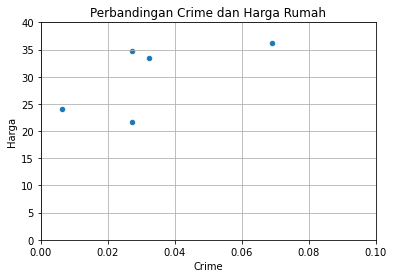

In [7]:
import matplotlib.pyplot as plt

harga_rmh_df.plot(kind='scatter', x='crime', y='harga')

plt.title('Perbandingan Crime dan Harga Rumah')
plt.xlabel('Crime')
plt.ylabel('Harga')
plt.xlim(0, 0.1)
plt.ylim(0, 40)
plt.grid(True)
plt.show()

Sumbu x akan di asosiasikan dengan kolom diameter, sedangkan sumbu y akan di asosiasikan dengan harga plt.xlim dan plt.ylim digunakan untuk mengatur jangkauan sumbu x dan sumbu y.

## Simple Linear Regression Model

### Penyesuaian Dataset 

In [8]:
import numpy as np

X = np.array(harga_rmh_df['crime'])
y = np.array(harga_rmh_df['harga'])

print(f'X: {X}')
print(f'y: {y}')

X: [0.00632 0.02731 0.02729 0.03237 0.06905]
y: [24.  21.6 34.7 33.4 36.2]


Mengelompokkan features dan target kedalam dua variable terpisah dan melakukan konversi struktur data yang semula menggunakan pandas dataframe menjadi numpy array.

In [9]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

Array yang ditampung dalam X akan di reshape

In [10]:
X

array([[0.00632],
       [0.02731],
       [0.02729],
       [0.03237],
       [0.06905]])

Disini variable X akan menampung suatu array 2 dimensi dimana jumlah barisnya ada 5 dan jumlah kolomnya ada 1. Proses transformasi ini dimungkinkan dengan memanggil method reshape

### Training Simple Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

Training dilakukan dengan menggunakan methode fit(). Membutuhkan 2 parameter yaitu sekumpulan nilai features dan sekumpulan nilai target dimana sekumpulan nilai features dan nilai targetnya sudah kita kembangkan kedalam variable X dan variable y.

### Visualisasi Simple Linear Regression Model

In [12]:
X_vis = np.array([0, 35]).reshape(-1, 1)
y_vis = model.predict(X_vis)

Model machine learning yang digunakan adalah linear model masih dibilang sangat sederhana maka disini bisa di visualisasikan model ini karena pada dasarnya linear model yang dihasilkan ini akan berupa garis lurus

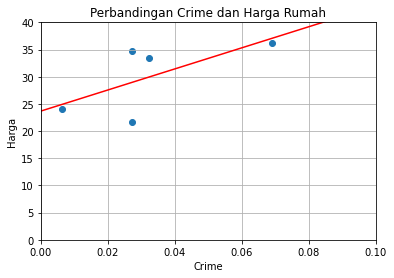

In [13]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Crime dan Harga Rumah')
plt.xlabel('Crime')
plt.ylabel('Harga')
plt.xlim(0, 0.1)
plt.ylim(0, 40)
plt.grid(True)
plt.show()

Untuk menvisualisasikan persamaan garis maka yang pertama menyiapkan 2 buah nilai untuk x yaitu nilai 0 dan nilai 0.1. Kedua nilai dilakukan karena ingin melakukan plotting pada area berukuran 0.1x40 dan mengambil nilai terkecil dan nilai terbesarnya yaitu 0 dan 40.

In [14]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 23.68545159348796
slope: [193.8692992]


Untuk menampilkan nilai intercept bisa dengan memanggil model objek lalu panggil .intercept Untuk menampilkan nilai slope bisa dengan memanggil model objek lalu panggil coef

### Mencari nilai slope
Nilai slope pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut:

$\beta = \frac{cov(x, y)}{var(x)}$

In [15]:
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[0.00632]
 [0.02731]
 [0.02729]
 [0.03237]
 [0.06905]]

X flatten: [0.00632 0.02731 0.02729 0.03237 0.06905]

y: [24.  21.6 34.7 33.4 36.2]


Untuk melakukan proses kalkulasi cov dan var lebih baik dikembalikan ke bentuk asalnya, untuk mengembalikan ke bentuk asalnya dapat menggunakan method flatten() yang tadinya dari 2 dimensi menjadi 1 dimensi

### Variance

In [16]:
variance_x = np.var(X.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 0.00051884672


Untuk menghitung nilai variance maka panggil np.var lalu dibutuhkan 2 parameter. Parameter pertama adalah nilai dari variable x yang sudah di flatten dan parameter kedua yaitu ddof yaitu dd of freedom. Hasil perhitungan varience akan di tampung kedalam variable variance_x

### Covariance

In [17]:
np.cov(X.flatten(), y)

array([[5.1884672e-04, 1.0058845e-01],
       [1.0058845e-01, 4.4662000e+01]])

Untuk menghitung nilai covariance membutuhkan 2 parameter, parameter pertama adalah nilai x yang telah di flatten kan lalu parameter kedua adalah y.

In [18]:
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 0.10058845000000002


Maka nilai yang perlu diambil berada di index ke 0 dan dimensi kedua berada di index ke 1

### Slope

In [19]:
slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 193.86929920266243


Setelah menemukan nilai variance dan covariance, dapat digunakanlah nilai slope dengan formula seperti diatas

### Mencari nilai intercept 
Nilai intercept pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut:

$\alpha = \bar{y} - \beta \bar{x}$

In [20]:
intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept: {intercept}')

intercept: 23.68545159348796


Nilai intercept diperoleh dengan menselisihkan nilai rata-rata dari y/target terhadap hasil perkalian antara slope dan nilai rata-rata dari x. Disini akan dikalkulasikan menggunakan script

### Prediksi

In [21]:
crime_town = np.array([10, 15, 20]).reshape(-1, 1)
crime_town

array([[10],
       [15],
       [20]])

Code diatas sudah disiapkan 3 nilai diameter yaitu (10, 15, 20) sebagai features yang akan kita prediksi, ketiga nilai tersebut akan di bundle sebagai numpy array oleh karena itu dilakukan pemanggilan np.array dan karena diatas hanya menggunakan 1 buah features yaitu diameter saja maka array nya perlu di reshape menjadi array 2 dimensi

In [22]:
prediksi_crime = model.predict(crime_town)
prediksi_crime

array([1962.37844362, 2931.72493963, 3901.07143565])

Hasil prediksi nya akan di tampung kedalam variable perdiksi_crime

In [23]:
for cmr, hrg in zip(crime_town, prediksi_crime):
    print(f'crime: {cmr} prediksi harga: {hrg}')

crime: [10] prediksi harga: 1962.3784436201122
crime: [15] prediksi harga: 2931.724939633424
crime: [20] prediksi harga: 3901.0714356467365


Code diatas adalah untuk melihat hasil prediksi dengan lebih jelas

## Evaluasi Simple Linear Regression Model

### Training & Testing Dataset

In [24]:
X_train = np.array([0.00632, 0.02731, 0.02729, 0.03237, 0.06905]).reshape(-1, 1)
y_train = np.array([24, 21.6, 34.7, 33.4, 36.2])

X_test = np.array([0.00735, 0.03932, 0.03123, 0.04234, 0.08023]).reshape(-1, 1)
y_test = np.array([22, 24.2, 25.6, 30.2, 35.6])

Karena X_train hanya memiliki 1 buah features sedangkan scikit learn membutuhkan features dalam bentuk matriks 2 dimensi maka perlu dilakukan proses reshape begitu juga dengan testing set

### Training Simple Linear Regression Model

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Dibentuk kembali objek model untuk di training dengan menggunakan linear regression. Ditampung ke dalam variable model. Dan objek model nya akan di training dengan memanggil method fit dan menyertakan x_train dan y_train sebagai parameternya

### Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared ( 𝑅2 )

In [26]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.20560405109924684


Code diatas akan melakukan proses prediksi nilai target dengan memanfaatkan nilai features pada testing set. Disini terdapat nilai y real (y_test) dan y hasil prediksi untuk membandingkan. R-squared semakin mendekati 1 maka semakin baik dan semakin mendekati 0 maka semakin buruk pula

### Mencari nilai R-squared ($R^2$)
$R^{2} = 1 - \frac{SS_{res}}{SS_{tot}}$

$SS_{res} =  \sum_{i=1}^{n}(y_i - f(x_i))^2$

$SS_{tot} =  \sum_{i=1}^{n}(y_i - \bar{y})^2$

$SS_{res}$

In [27]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
              for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 93.45909459627583


Code diatas banyak menggunakan proses list comprehension. Sum squares residual merupakan proses perhitungan selisih antara setiap nilai y pada testing set dengan nilai prediksinya. Lalu nilai selisih ini dipangkatkan 2 dan dijumlahkan secara keseluruhan

$SS_{tot}$

In [28]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 117.64800000000002


Sum squares total merupakan proses perhitungan selisih nilai untuk setiap nilai y pada testing set dengan nilai rata-ratanya dan nilai selisih nya akan dipangkatkan 2 lalu akan diakumulasikan dengan keseluruhan nilai y yang ada dan nilai y nya ini dikenal dengan istilah Sum Square Total

$R^2$

In [29]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.20560405109924684


Mencari nilai R2 diperoleh dengan cara 1 diselisihkan dengan pembagian antara nilai SSres dibagi dengan SStot maka dapat ditemukanlah nilai R2

# Regression KNN
* KNN adalah model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat.
* Prediksi yang dilakukan dapat diterapkan baik pada classification maupun regression tasks.

Referensi: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Sample Dataset

In [4]:
import pandas as pd

harga_rmh = {'crime': [0.00632, 0.02731, 0.02729, 0.03237, 0.06905], 
         'room': [6.575, 6.421, 7.185, 6.998, 7.147],
         'harga': [24, 21.6, 34.7, 33.4, 36.2]}

harga_rmh_df = pd.DataFrame(harga_rmh)
harga_rmh_df

,crime,room,harga
0,0.00632,6.575,24.0
1,0.02731,6.421,21.6
2,0.02729,7.185,34.7
3,0.03237,6.998,33.4
4,0.06905,7.147,36.2


siapkan sebuah variable yang akan menampung suatu data dictionary dimana dictionanry ini akan menampung tiga buah keys yaitu crime, room, dan harga. harga ini akan berasosiasi dengan daftar target sedangkan crime dan room ini akan berasosiasi dengan nilai tingkat kejahatan di suatu kota dan juga rata-rata kamar.

Alasan mengambil features tersebut untuk mengetahui harga rumah bila diketahui tingkat kejahatan dan rata-rata kamar pada suatu kota

### Features & Target

In [5]:
import numpy as np

X_train = np.array(harga_rmh_df[['crime', 'room']])
y_train = np.array(harga_rmh_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[6.320e-03 6.575e+00]
 [2.731e-02 6.421e+00]
 [2.729e-02 7.185e+00]
 [3.237e-02 6.998e+00]
 [6.905e-02 7.147e+00]]

y_train: [24.  21.6 34.7 33.4 36.2]


Code diatas memanfaatkan KNN untuk melakukan prediksi harga berdasarkan data tingkat kejahatan dan rata-rata kamar, karena disini yang diprediksi berupa nilai continous dan bukan kategori maka ini akan termasuk dalam regression task.

### Training KNN Regression Model

In [7]:
from sklearn.neighbors import KNeighborsRegressor

K = 3 
model = KNeighborsRegressor(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Model machine learning yang akan digunakan adalah KNN dan yang akan di import adalah KNeighborsRegressor karena akan menggunakan KNN untuk regression tasks.

### Prediksi

In [14]:
X_new = np.array([[25.31, 25.42]])
X_new

array([[25.31, 25.42]])

Selanjutnya train model yang sebelumnya akan digunakan untuk melakukan prediksi harga berdasarkan data tingkat kejahatan dan rata-rata kamar

In [15]:
y_pred = model.predict(X_new)
y_pred

array([34.76666667])

Selanjutnya kita akan melakukan prediksi harga dengan memanfaatkan model KNeighborsRegressor yang sudah di training sebelumnya.

### Evaluasi KNN Regression Model

In [16]:
X_test = np.array([[0.00632, 6.575], [0.02731, 6.421], [0.02729, 7.185], [0.03237, 6.998],[0.06905, 7.147]])
y_test = np.array([23, 21.5, 32.6, 32.1, 34.2])

print(f'X_test:\n{X_test}\n')
print(f'y_test: {y_test}')

X_test:
[[6.320e-03 6.575e+00]
 [2.731e-02 6.421e+00]
 [2.729e-02 7.185e+00]
 [3.237e-02 6.998e+00]
 [6.905e-02 7.147e+00]]

y_test: [23.  21.5 32.6 32.1 34.2]


Disini akan menggunakan beberapa matriks untuk mengukur performa dari model machine learning untuk kasus Regression task tapi sebelumnya kita harus menyiapkan testing set nya. Code diatas sudah disiapkan 5 buah data point, Pertama siapkan dulu sekumpulan nilai features untuk testing set nya kemudian dimasukkan kedalam variable X_test selain itu juga perlu disiapkan sekumpulan nilai target untuk kita tampung kedalam variable y_test.

In [17]:
y_pred = model.predict(X_test)
y_pred

array([26.33333333, 26.33333333, 34.76666667, 34.76666667, 34.76666667])

Setelah testing set nya siap selanjutnya akan dilakukan prediksi terhadap testing set dengan memanfaatkan model KNN Regessor yang sudah di training sebelumnya

### Coefficient of Determination atau $R^2$

In [18]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.6703250920501963


jika R-squared semakin mendekati 1 maka semakin baik dan jika R-squared semakin mendekati 0 atau bahkan nilainya negatif maka mengindikasikan bahwa modelnya kurang baik

### Mean Absolute Error (MAE) atau Mean Absolute Deviation (MAD)
$MAE$ is the average of the absolute values of the errors of the predictions.

$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$

In [19]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)

print(f'MAE: {MAE}')

MAE: 2.713333333333334


Mean Absolute Error atau yang biasa disebut sebagai Mean Absolute Deviation adalah nilai rata-rata dari absolute error dari prediksi. MAE akan menghiting selisih atau error antara 𝑦𝑖 dengan 𝑦̂𝑖, 𝑦𝑖 ini merepresentasikan setiap nilai target pada testing set sedangkan 𝑦̂𝑖 ini merupakan nilai prediksi yang dihasilkan oleh model kita. Proses perhitungan selisih ini akan memungkinkan saja untuk menghasilkan nilai positif atau negatif, jika hasil prediksinya ternyata lebih kecil dari apa yang seharusnya maka nilainya positif, tetapi jika hasil prediksinya ternyata lebih besar dari yang seharusnya maka nilainya akan menjadi negatif, untuk menghindari nilai negatif maka harus menerapkan yang namanya absolute function yang berfungsi untuk menghilangkan nilai negatif.

### Mean Squared Error (MSE) atau Mean Squared Deviation (MSD)
$MSE$ is the average of the squares of the errors of the predictions.

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

In [20]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)

print(f'MSE: {MSE}')

MSE: 9.319777777777777


Mean Squared Error atau yang biasa disebut dengan Mean Squared Deviation akan menghitung selisih atau error antara 𝑦𝑖 dengan 𝑦̂𝑖. 𝑦𝑖 merupakan nilai target dari testing set, sedangkan 𝑦̂𝑖 merupakan nilai estimasi yang dihasilkan oleh model kita. Untuk menghindari kemunculan nilai negatif pas MSE selisih nilainya akan dipangkatkan 2.

### Menerapkan Features Scaling pada KNN
#### Dataset

In [22]:
import numpy as np
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Training Set
X_train = np.array([[0.00521, 5.213], [0.03123, 7.239], [0.03123, 5.213], [0.02152, 5.2134],[0.03421, 6.2312]])
y_train = np.array([21, 22.3, 35.2, 33.4, 37.4])


# Test Set
X_test = np.array([[0.00632, 6.575], [0.02731, 6.421], [0.02729, 7.185], [0.03237, 6.998],[0.06905, 7.147]])
y_test = np.array([23, 21.5, 32.6, 32.1, 34.2])

Code diatas menjelaskan bagaimana features scaling akan berpotensi dalam meningkatkan performa dari model KNN. Features Scaling yang akan digunakan adalah Standard Scaler.

#### Features Scaling (Standard Scaler)

In [23]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

print(f'X_train_scaled:\n{X_train_scaled}\n')
print(f'X_test_scaled:\n{X_test_scaled}\n')

X_train_scaled:
[[-1.83046227 -0.75095351]
 [ 0.61579496  1.7476207 ]
 [ 0.61579496 -0.75095351]
 [-0.29708581 -0.7504602 ]
 [ 0.89595816  0.50474652]]

X_test_scaled:
[[-1.72610618  0.92873952]
 [ 0.24725813  0.73881828]
 [ 0.24537784  1.68102494]
 [ 0.72297149  1.45040629]
 [ 4.17142326  1.63416126]]



Hasil code diatas merupakan X_train yang sudah di scaling dan X_test yang sudah di scaling

#### Training & Evaluasi Model

In [24]:
model.fit(X_train_scaled, y_train) #features yang sudah kita scalling
y_pred = model.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')

MAE: 3.34
MSE: 23.402444444444452


Nilai MAE dan MSE setelah menerapkan fitur scaling bisa dilihat bahwa hasilnya lebih kecil atau dengan kata lain kita bisa menghasilkan model dengan kualitas atau performa yang lebih baik setelah menerapkan fitur scaling.